# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import sys 
!{sys.executable} -m pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | udachnyy
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | tukrah
Processing Record 5 of Set 1 | half moon bay
Processing Record 6 of Set 1 | artyk
City not found. Skipping...
Processing Record 7 of Set 1 | mitchell
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | san jose
Processing Record 11 of Set 1 | alberton
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | samarai
Processing Record 17 of Set 1 | yulara
Processing Record 18 of Set 1 | santa rosa de cabal
Processing Record 19 of Set 1 | mackay
Processing Record 20 of Set 1 | baltasi
Processing Record 21 of Set 1 | san patricio
Processin

Processing Record 37 of Set 4 | muroto
Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | bud
Processing Record 40 of Set 4 | naze
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | salou
Processing Record 43 of Set 4 | aksha
Processing Record 44 of Set 4 | baker city
Processing Record 45 of Set 4 | westport
Processing Record 46 of Set 4 | meyungs
City not found. Skipping...
Processing Record 47 of Set 4 | novouzensk
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | tuatapere
Processing Record 0 of Set 5 | haines junction
Processing Record 1 of Set 5 | mayo
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | deputatskiy
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | beidao
Processing Record 6 of Set 5 | amderma
City not found. Skipping...
Processing Record 7 of Set 5 | boguchany
Processing Record 8 of Set 5 | sorong
Processing Record 9 of Set 5 | jumla
Processing Record 10 of Set 5

Processing Record 26 of Set 8 | margate
Processing Record 27 of Set 8 | chikwawa
Processing Record 28 of Set 8 | barcelos
Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | la ronge
Processing Record 31 of Set 8 | luebo
Processing Record 32 of Set 8 | bratsk
Processing Record 33 of Set 8 | sao geraldo do araguaia
Processing Record 34 of Set 8 | gao
Processing Record 35 of Set 8 | elliot lake
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | imbituba
Processing Record 38 of Set 8 | sakakah
Processing Record 39 of Set 8 | onega
Processing Record 40 of Set 8 | sovetskiy
Processing Record 41 of Set 8 | roma
Processing Record 42 of Set 8 | mafinga
Processing Record 43 of Set 8 | corrente
Processing Record 44 of Set 8 | ferrol
Processing Record 45 of Set 8 | rusape
Processing Record 46 of Set 8 | lorengau
Processing Record 47 of Set 8 | de aar
Processing Record 48 of Set 8 | carlsbad
Processing Record 49 of Set 8 | salym
Processing Record 0 of Set 

Processing Record 13 of Set 12 | vanimo
Processing Record 14 of Set 12 | colares
Processing Record 15 of Set 12 | kurilsk
Processing Record 16 of Set 12 | le moule
Processing Record 17 of Set 12 | thunder bay
Processing Record 18 of Set 12 | mezen
Processing Record 19 of Set 12 | esperance
Processing Record 20 of Set 12 | pathein
Processing Record 21 of Set 12 | oroville
Processing Record 22 of Set 12 | karasburg
Processing Record 23 of Set 12 | santa cruz do capibaribe
Processing Record 24 of Set 12 | lompoc
Processing Record 25 of Set 12 | vao
Processing Record 26 of Set 12 | stokmarknes
Processing Record 27 of Set 12 | aswan
Processing Record 28 of Set 12 | egvekinot
Processing Record 29 of Set 12 | san luis
Processing Record 30 of Set 12 | nogales
Processing Record 31 of Set 12 | pilar
Processing Record 32 of Set 12 | alcazar de san juan
Processing Record 33 of Set 12 | ayan
Processing Record 34 of Set 12 | akdepe
Processing Record 35 of Set 12 | attawapiskat
City not found. Skippi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,udachnyy,66.4167,112.4000,235.62,73,98,1.14,RU,1675818096
1,jamestown,42.0970,-79.2353,281.92,75,100,6.17,US,1675817815
2,nanortalik,60.1432,-45.2371,257.85,72,8,8.65,GL,1675818107
3,tukrah,32.5341,20.5791,284.52,65,99,4.81,LY,1675818108
4,half moon bay,37.4636,-122.4286,289.40,67,0,6.69,US,1675818108


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachnyy,66.4167,112.4000,235.62,73,98,1.14,RU,1675818096
1,jamestown,42.0970,-79.2353,281.92,75,100,6.17,US,1675817815
2,nanortalik,60.1432,-45.2371,257.85,72,8,8.65,GL,1675818107
3,tukrah,32.5341,20.5791,284.52,65,99,4.81,LY,1675818108
4,half moon bay,37.4636,-122.4286,289.40,67,0,6.69,US,1675818108


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

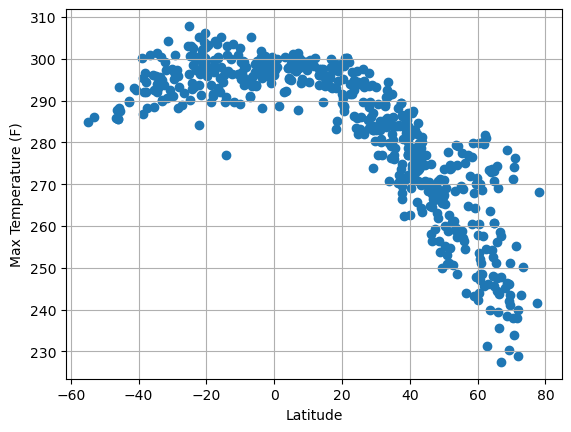

In [9]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
x_values= city_data_df["Lat"]
y_values= city_data_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

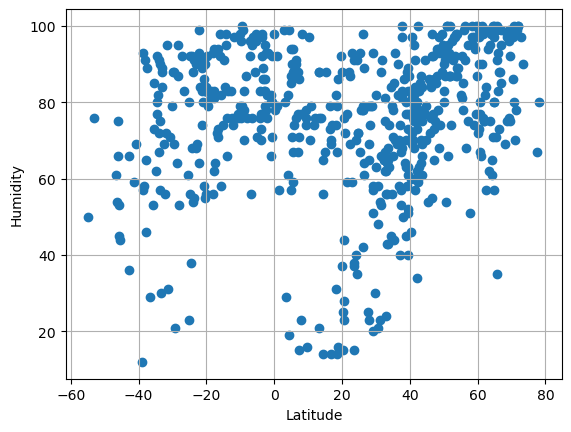

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_df["Lat"]
y_values= city_data_df["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

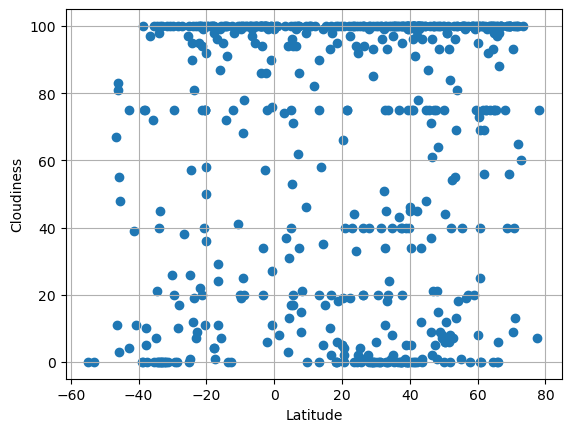

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values= city_data_df["Lat"]
y_values= city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

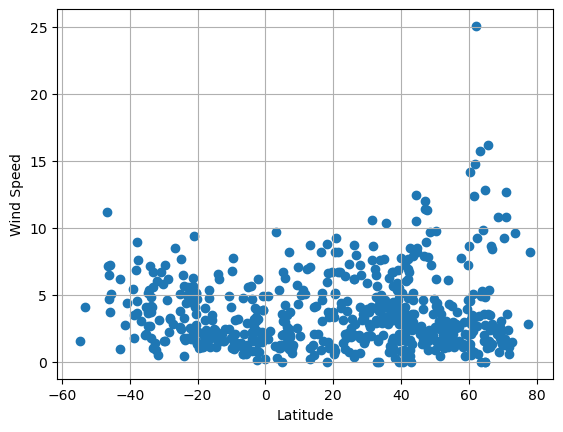

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values= city_data_df["Lat"]
y_values= city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,udachnyy,66.4167,112.4000,235.62,73,98,1.14,RU,1675818096
1,jamestown,42.0970,-79.2353,281.92,75,100,6.17,US,1675817815
2,nanortalik,60.1432,-45.2371,257.85,72,8,8.65,GL,1675818107
3,tukrah,32.5341,20.5791,284.52,65,99,4.81,LY,1675818108
4,half moon bay,37.4636,-122.4286,289.40,67,0,6.69,US,1675818108


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,bredasdorp,-34.5322,20.0403,292.08,77,21,3.68,ZA,1675818109
10,ushuaia,-54.8000,-68.3000,284.96,50,0,1.54,AR,1675818110
11,saint-philippe,-21.3585,55.7679,297.92,83,94,6.23,RE,1675818110
13,samarai,-10.6167,150.6667,300.98,77,100,4.93,PG,1675818112
14,yulara,-25.2406,130.9889,307.86,23,0,5.03,AU,1675818114


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7401947843656458


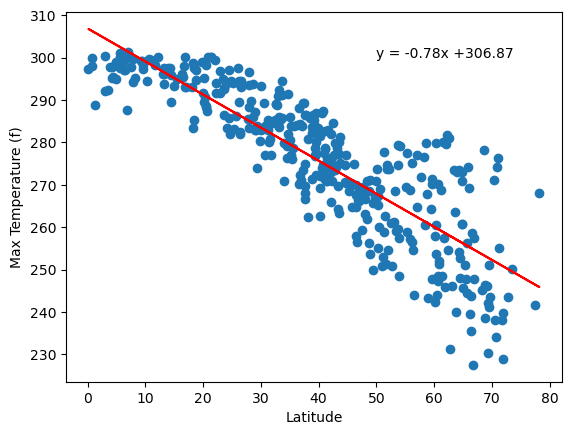

In [49]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Max Temp"]

if x_values.shape[0] == y_values.shape[0]:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
else:
    print("Error: x and y must have the same number of elements")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.text(50, 300, line_eq)
# Show plot
plt.show()

The r-value is: 0.15791477229171522


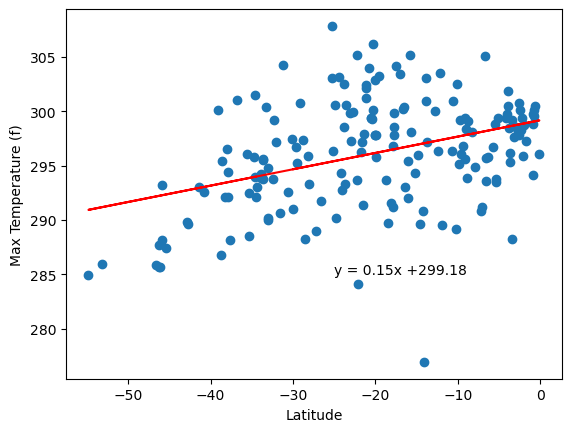

In [54]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]

if x_values.shape[0] == y_values.shape[0]:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
else:
    print("Error: x and y must have the same number of elements")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.text(-25, 285, line_eq)
# Show plot
plt.show()

**Discussion about the linear relationship:** The first graph shows a negative correlation and the second graph shows a slightly positive correlation tellings us that the more postive the latitude, the higher the areas max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13227306720634685


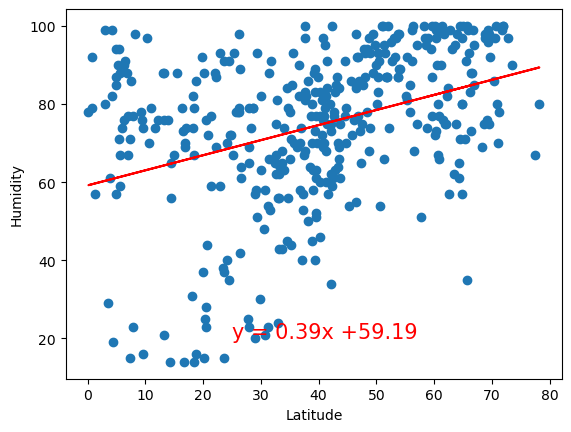

In [58]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]

if x_values.shape[0] == y_values.shape[0]:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
else:
    print("Error: x and y must have the same number of elements")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(25,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

The r-value is: 0.19953647029465602


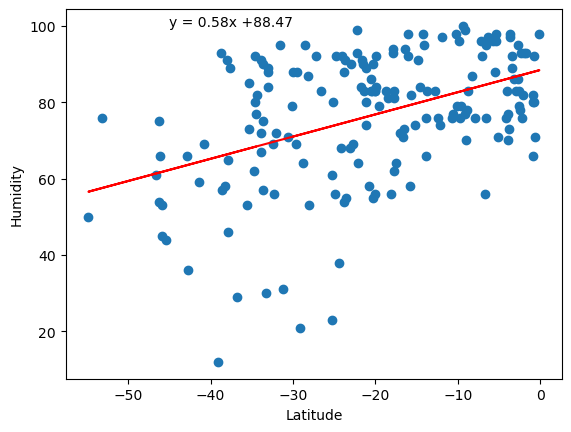

In [60]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]

if x_values.shape[0] == y_values.shape[0]:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
else:
    print("Error: x and y must have the same number of elements")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.text(-45, 100, line_eq)
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

**Discussion about the linear relationship:** The two graphs show a slight postive correlation between the two. They both confirm that the more positve the latitude, the higher the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01868477176761296


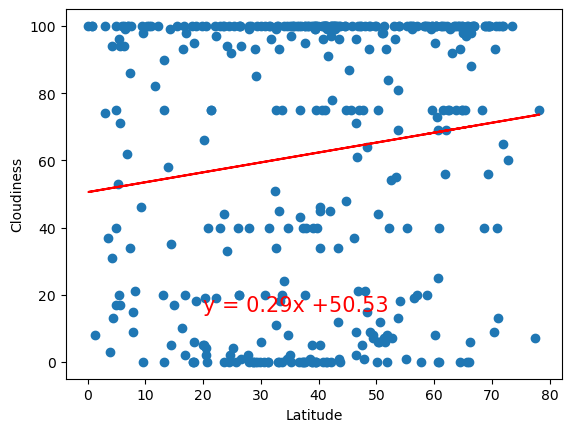

In [62]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]

if x_values.shape[0] == y_values.shape[0]:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
else:
    print("Error: x and y must have the same number of elements")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

The r-value is: 0.17683878543119602


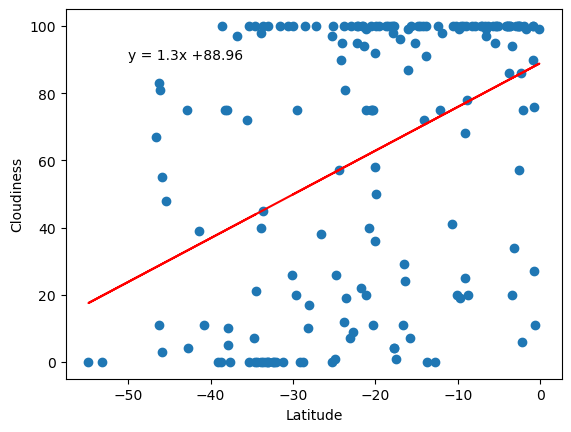

In [67]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]

if x_values.shape[0] == y_values.shape[0]:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
else:
    print("Error: x and y must have the same number of elements")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.text(-50, 90, line_eq)
# Show plot
plt.show()

**Discussion about the linear relationship:** The two graphs show no correlation between clouds and latitude point. The graphs are telling us the cloudiness of an area has more variables to it than latitudal location.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008262465720082877


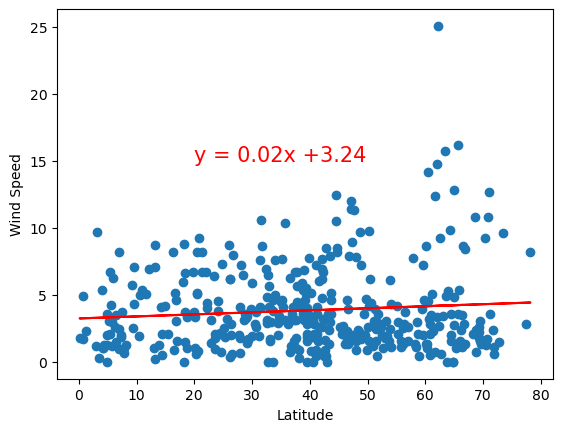

In [39]:
# Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]

if x_values.shape[0] == y_values.shape[0]:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
else:
    print("Error: x and y must have the same number of elements")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

The r-value is: 0.1360436495915566


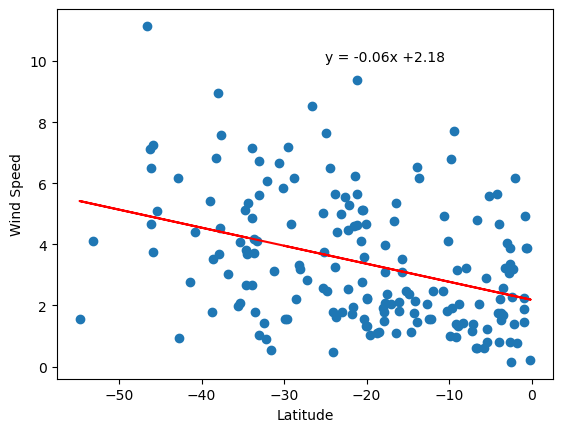

In [73]:
# Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]

if x_values.shape[0] == y_values.shape[0]:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
else:
    print("Error: x and y must have the same number of elements")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=20,color="red")
print(f"The r-value is: {rvalue**2}")
plt.text(-25, 10, line_eq)
# Show plot
plt.show()

**Discussion about the linear relationship:** The two graphs are showing slightly negative to no correlation between to the two. This means that the wind speed stays consistent throughout latitudes.